In [1]:
pip install -e RdQuantum

Obtaining file:///mnt/c/Users/every/OneDrive/Documents/Yataiga/QFoam/GitHub/RdQuantum/RdQuantum
  Preparing metadata (setup.py) ... done
  Attempting uninstall: rdquantum
    Found existing installation: rdquantum 2023.4.22
    Uninstalling rdquantum-2023.4.22:
      Successfully uninstalled rdquantum-2023.4.22
  Running setup.py develop for rdquantum
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import the gymnasium and the environment wrapper
import gymnasium as gym
import rdquantum

from ray.rllib.algorithms import ppo
from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune.logger import pretty_print
from ray.tune.registry import register_env

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (10, 5)

# Loading Environment

In [3]:
# load environment
env = gym.make('rdquantum/QubitStatePrep-v2023.04.11')

def env_creator(env_config):
    return env  # return an env instance

register_env("QubitStatePrep-v2023.04.11", env_creator)

In [4]:
algo = (
    PPOConfig()
    .training(train_batch_size=30, sgd_minibatch_size=30, num_sgd_iter=20)
    .rollouts(num_rollout_workers=1)
    .resources(num_gpus=0)
    # .environment(env='QubitStatePrep-v2023.04.11', disable_env_checking=True)
    .environment(env='QubitStatePrep-v2023.04.11', disable_env_checking=True)
    .build()
)

episode_rewards = []
for i in range(50):
    result = algo.train()
    episode_reward = np.asarray(result['hist_stats']['episode_reward'][-30:])
    episode_rewards.append(episode_reward)

#     if i % 5 == 0:
#         checkpoint_dir = algo.save()
#         print(f"Checkpoint saved in directory {checkpoint_dir}")
episode_rewards = np.asarray(episode_rewards)

2023-04-22 11:25:41,662	INFO worker.py:1553 -- Started a local Ray instance.
2023-04-22 11:25:57,623	INFO trainable.py:172 -- Trainable.setup took 19.277 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2023-04-22 11:25:57,630	WARNING util.py:67 -- Install gputil for GPU system monitoring.


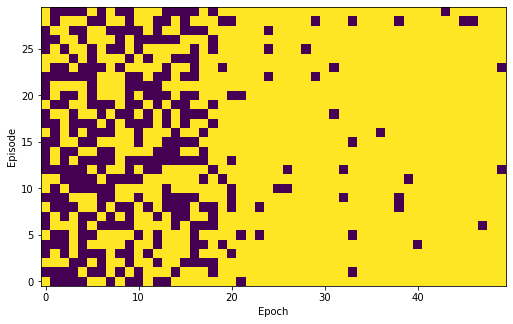

In [5]:
plt.matshow(episode_rewards.transpose())
plt.xlabel("Epoch")
plt.ylabel("Episode")
plt.gca().invert_yaxis()
plt.gca().tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
# plt.colorbar()